In [1]:
import numpy as np
import pandas as pd


In [2]:
col_naam = ['YEAR','DISTRICT','UPAZILA/THANA','EIIN','INSTITUTE NAME','SIX','SEVEN','EIGHT','NINE','TEN']
df_cultivation = pd.read_excel("school_data.xls",header = None,  skiprows = 4, usecols = list(range(0, 10)))

In [3]:
df_cultivation.set_axis(col_naam, axis = 1, inplace = True)
df_cultivation.head()

,YEAR,DISTRICT,UPAZILA/THANA,EIIN,INSTITUTE NAME,SIX,SEVEN,EIGHT,NINE,TEN
0,2016,BARGUNA,AMTALI,100003,DAKSHIN KATHALIA TAZEM ALI SECONDARY SCHOOL,90.0,70.0,50.0,30.0,25.0
1,2016,BARGUNA,AMTALI,100009,LOCHA JUUNIOR HIGH SCHOOL,25.0,16.0,15.0,NaN,NaN
2,2016,BARGUNA,AMTALI,100011,AMTALI A.K. PILOT HIGH SCHOOL,69.0,54.0,62.0,62.0,52.0
3,2016,BARGUNA,AMTALI,100012,CHOTONILGONG HIGH SCHOOL,45.0,34.0,32.0,5.0,21.0
4,2016,BARGUNA,AMTALI,100014,SHAKHRIA HIGH SCHOOL,25.0,25.0,20.0,25.0,20.0


In [4]:
data = df_cultivation
data["OCCUPATION"] = "cultivation"
data.head()

,YEAR,DISTRICT,UPAZILA/THANA,EIIN,INSTITUTE NAME,SIX,SEVEN,EIGHT,NINE,TEN,OCCUPATION
0,2016,BARGUNA,AMTALI,100003,DAKSHIN KATHALIA TAZEM ALI SECONDARY SCHOOL,90.0,70.0,50.0,30.0,25.0,cultivation
1,2016,BARGUNA,AMTALI,100009,LOCHA JUUNIOR HIGH SCHOOL,25.0,16.0,15.0,NaN,NaN,cultivation
2,2016,BARGUNA,AMTALI,100011,AMTALI A.K. PILOT HIGH SCHOOL,69.0,54.0,62.0,62.0,52.0,cultivation
3,2016,BARGUNA,AMTALI,100012,CHOTONILGONG HIGH SCHOOL,45.0,34.0,32.0,5.0,21.0,cultivation
4,2016,BARGUNA,AMTALI,100014,SHAKHRIA HIGH SCHOOL,25.0,25.0,20.0,25.0,20.0,cultivation


In [5]:
data.shape

(19279, 11)

In [6]:
data.SIX.mean()

62.88575441882243

In [7]:
df = pd.read_excel("school_data.xls",header = None, usecols = [0,1,2,3,4,15,16,17,18,19] , skiprows = 4)

In [8]:
def convert_data(path):
    import pandas as pd
    import numpy as np
    
    #df = pd.DataFrame()
    d = pd.read_excel(path,header = None,  
                                   skiprows = 4, usecols = list(range(0, 10)))
    d.columns = ['YEAR','DISTRICT','UPAZILA/THANA','EIIN','INSTITUTE NAME','SIX',
                          'SEVEN','EIGHT','NINE','TEN']
    d["OCCUPATION"] = "cultivation"
    list_of_occupation = [{"worker_six": [x for x in range(15) if x not in range(5,10)]},
                      {"businessman":[x for x in range(20) if x not in range(5,15)]},
                     {"small business": [x for x in range(25) if x not in range(5,20)]},
                     {"government service": [x for x in range(30) if x not in range(5,25)]},
                     {"private service": [x for x in range(35) if x not in range(5,30)]},
                     {"doctor": [x for x in range(40) if x not in range(5,35)]}, 
                     {"lawyer": [x for x in range(45) if x not in range(5,40)]},
                     {"teacher": [x for x in range(50) if x not in range(5,45)]},
                     {"fisherman": [x for x in range(55) if x not in range(5,50)]},
                     {"tati": [x for x in range(60) if x not in range(5,55)]},
                     {"kamar-kumar": [x for x in range(65) if x not in range(5,60)]},
                     {"expatriate": [x for x in range(70) if x not in range(5,65)]},
                     {"engineer": [x for x in range(75) if x not in range(5,70)]},
                     {"others": [x for x in range(80) if x not in range(5,75)]} ]
    
    for item in list_of_occupation:
        type = list(item.items())[0][0]
        cols = list(item.items())[0][1]
        df_new = pd.read_excel(path, skiprows = 4, usecols = cols, header = None)
        df_new.columns = ['YEAR','DISTRICT','UPAZILA/THANA','EIIN','INSTITUTE NAME','SIX',
                          'SEVEN','EIGHT','NINE','TEN']
        df_new["OCCUPATION"] = type
        d =pd.concat([d, df_new])
    
    return d

In [9]:
latest_data = convert_data("school_data.xls")

In [10]:
latest_data.head()

,YEAR,DISTRICT,UPAZILA/THANA,EIIN,INSTITUTE NAME,SIX,SEVEN,EIGHT,NINE,TEN,OCCUPATION
0,2016,BARGUNA,AMTALI,100003,DAKSHIN KATHALIA TAZEM ALI SECONDARY SCHOOL,90.0,70.0,50.0,30.0,25.0,cultivation
1,2016,BARGUNA,AMTALI,100009,LOCHA JUUNIOR HIGH SCHOOL,25.0,16.0,15.0,NaN,NaN,cultivation
2,2016,BARGUNA,AMTALI,100011,AMTALI A.K. PILOT HIGH SCHOOL,69.0,54.0,62.0,62.0,52.0,cultivation
3,2016,BARGUNA,AMTALI,100012,CHOTONILGONG HIGH SCHOOL,45.0,34.0,32.0,5.0,21.0,cultivation
4,2016,BARGUNA,AMTALI,100014,SHAKHRIA HIGH SCHOOL,25.0,25.0,20.0,25.0,20.0,cultivation


In [11]:
latest_data.OCCUPATION.unique()

array(['cultivation', 'worker_six', 'businessman', 'small business',
       'government service', 'private service', 'doctor', 'lawyer',
       'teacher', 'fisherman', 'tati', 'kamar-kumar', 'expatriate',
       'engineer', 'others'], dtype=object)

In [12]:
latest_data[latest_data["EIIN"] == 103154]

,YEAR,DISTRICT,UPAZILA/THANA,EIIN,INSTITUTE NAME,SIX,SEVEN,EIGHT,NINE,TEN,OCCUPATION
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,150.0,130.0,135.0,100.0,90.0,cultivation
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,25.0,20.0,25.0,20.0,15.0,worker_six
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,30.0,15.0,20.0,5.0,7.0,businessman
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,40.0,25.0,2.0,10.0,9.0,small business
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,5.0,2.0,4.0,2.0,5.0,government service
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,4.0,3.0,5.0,3.0,2.0,private service
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,2.0,NaN,NaN,NaN,NaN,doctor
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,2.0,NaN,NaN,NaN,NaN,lawyer
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,3.0,1.0,2.0,NaN,2.0,teacher
1675,2016,BRAHAMANBARIA,AKHAURA,103154,DEVAGRAM PILOT HIGH SCHOOOL,15.0,12.0,12.0,10.0,8.0,fisherman


In [13]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289185 entries, 0 to 19278
Data columns (total 11 columns):
YEAR              289185 non-null int64
DISTRICT          289185 non-null object
UPAZILA/THANA     289185 non-null object
EIIN              289185 non-null int64
INSTITUTE NAME    289185 non-null object
SIX               119427 non-null float64
SEVEN             117811 non-null float64
EIGHT             115688 non-null float64
NINE              105887 non-null float64
TEN               102283 non-null float64
OCCUPATION        289185 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 26.5+ MB


In [14]:
#latest_data.to_csv("school_data.csv")

In [14]:
new_data = latest_data.copy()

In [18]:
new_data.fillna(0, inplace = True)

In [20]:
len(new_data["DISTRICT"].unique())

64

In [21]:
tati_data = new_data[new_data["OCCUPATION"] == 'tati']

In [37]:
tati_data_by_top10_district = tati_data.groupby("DISTRICT")["SIX"].sum().sort_values(ascending = False)[:10]

In [38]:
tati_data_by_top10_district = tati_data_by_top10_district.to_frame()

In [47]:
tati_data_by_top10_district.reset_index(inplace = True)

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

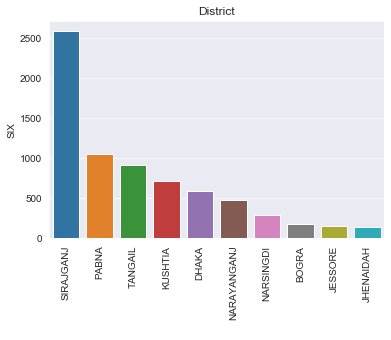

In [58]:
sns.set_style("darkgrid")
sns.barplot(data = tati_data_by_top10_district, x = "DISTRICT", y=  "SIX")
plt.xlabel(" ")
plt.title("District")
plt.xticks(rotation=90)